In [16]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [17]:
image = cv2.imread('DATA/bit.jpg')

In [18]:
def display(img):
    image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    figure = plt.figure(figsize=[8,10])
    ax = figure.add_subplot(111)
    ax.imshow(image)

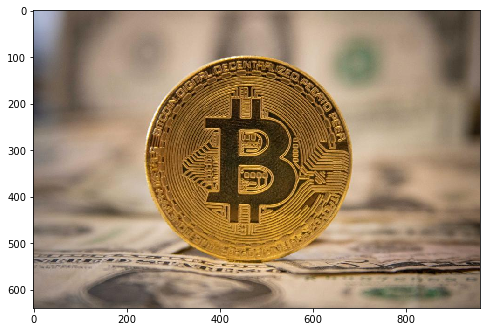

In [19]:
display(image)

In [20]:
image.dtype

dtype('uint8')

In [21]:
sub_image = image[200:400,375:575]
sub_image.dtype

dtype('uint8')

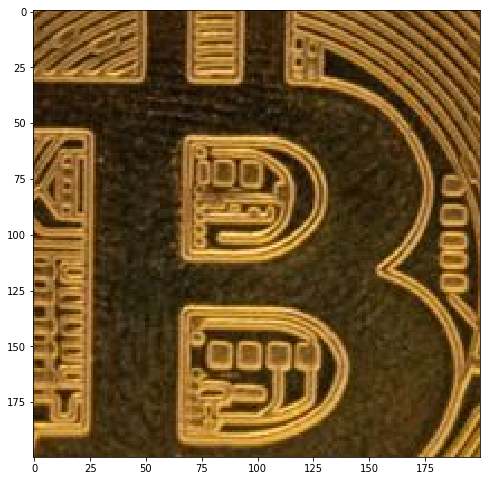

In [22]:
display(sub_image)

In [23]:
# template matching
method_names = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
                'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

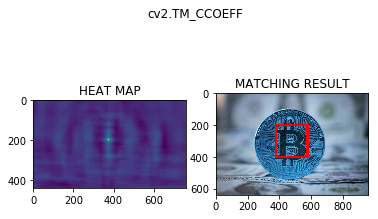

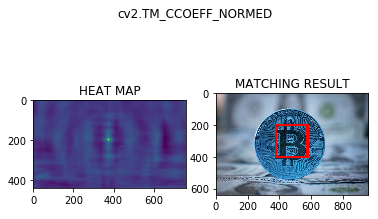

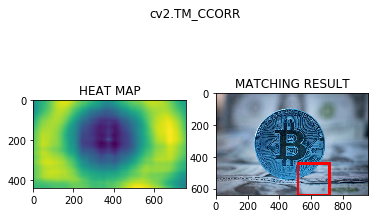

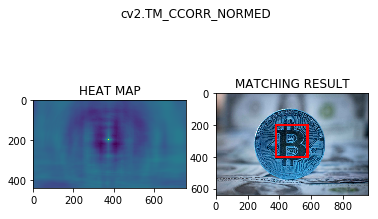

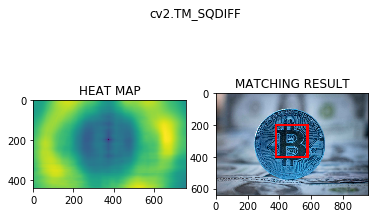

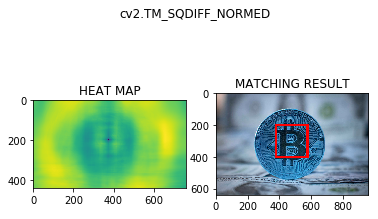

In [25]:
for mthd in method_names:
    current_method = eval(mthd)
    target_image = image.copy()
    result = cv2.matchTemplate(target_image,sub_image,current_method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)
    if mthd in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channel = sub_image.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    cv2.rectangle(target_image,top_left,bottom_right,(255,0,0),15)
    
    #plotting
    
    plt.subplot(121) # one row and 2 columns and this will be 1 column
    plt.title('HEAT MAP')
    plt.imshow(result)
    
    plt.subplot(122) # this will be 2 column
    plt.title('MATCHING RESULT')
    plt.imshow(target_image)
    
    plt.suptitle(mthd)
    plt.show()

In [45]:
bitcoin_img = cv2.imread('DATA/bit.jpg')
target_image = cv2.imread('DATA/bitcoin.jpg')

In [46]:
def display(img):
    image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    figure = plt.figure(figsize=[8,10])
    ax = figure.add_subplot(111)
    ax.imshow(image)

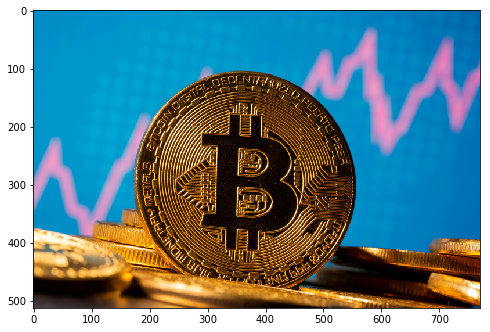

In [47]:
display(target_image)

In [61]:
# feature matching with orb detector
orb = cv2.ORB_create()

In [62]:
key1,dec1 = orb.detectAndCompute(bitcoin_img,None)
key2,dec2 = orb.detectAndCompute(target_image,None)

In [63]:
bfmatcher = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)

In [64]:
matches = bfmatcher.match(dec1,dec2)
good_matches = sorted(matches,key=lambda x:x.distance)

In [65]:
output_img = cv2.drawMatches(bitcoin_img,key1,target_image,key2,good_matches[:30],None,flags=2)

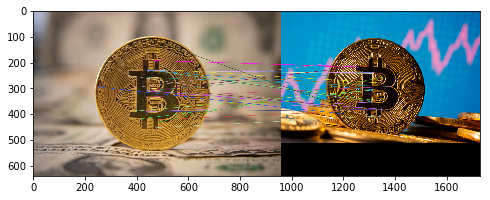

In [66]:
display(output_img)

In [53]:
goodmatches = []

In [54]:
sift = cv2.SIFT_create()

In [55]:
key1,dec1 = sift.detectAndCompute(bitcoin_img,None)
key2,dec2 = sift.detectAndCompute(target_image,None)

In [56]:
bfmatcher = cv2.BFMatcher_create(cv2.NORM_L2)

In [57]:
matches = bfmatcher.knnMatch(dec1,dec2,k=2)

In [58]:
for match1,match2 in matches:
    if match1.distance<=0.75*match2.distance:
        goodmatches.append([match1])

In [59]:
output_img2 = cv2.drawMatchesKnn(bitcoin_img,key1,target_image,key2,goodmatches,None,flags=2)

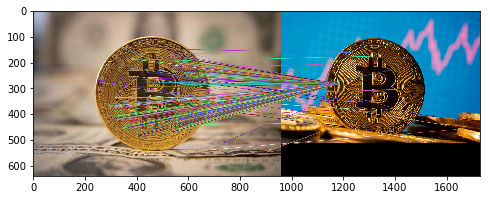

In [60]:
display(output_img2)

In [67]:
sift = cv2.SIFT_create()

In [68]:
key1,dec1 = sift.detectAndCompute(bitcoin_img,None)
key2,dec2 = sift.detectAndCompute(target_image,None)

In [69]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [71]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(dec1,dec2,k=2)

In [72]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

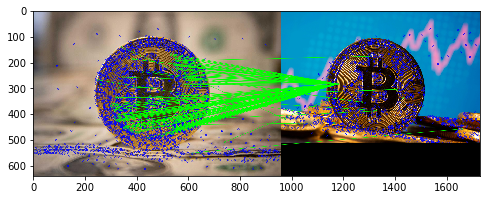

In [75]:
output_img3 = cv2.drawMatchesKnn(bitcoin_img,key1,target_image,key2,matches,None,**draw_params)
display(output_img3)